In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,242,2024-02-10,1.91,1,0,48,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,349,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,291,2023-11-19,2.52,4,357,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.646150,-73.759660,Entire home/apt,68.0,2,333,2024-02-01,3.12,2,148,28,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,140.0,1,306,2023-12-26,2.89,4,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1072781767409521866,The Bluebird’s Nest,426223840,Antonio,NaN,ELEVENTH WARD,42.663916,-73.777869,Entire home/apt,117.0,1,0,NaN,NaN,2,0,0,NaN
403,1073179963201889958,In the heart of Albany,31994990,G.G.,NaN,SEVENTH WARD,42.644729,-73.776412,Entire home/apt,53.0,30,0,NaN,NaN,2,271,0,NaN
404,1074653929117126641,Room available,480004905,Ramiz,NaN,ELEVENTH WARD,42.662827,-73.774371,Private room,60.0,1,0,NaN,NaN,2,269,0,NaN
405,1075444056381274297,The Tangerine Door,542733174,Rebecca,NaN,TWELFTH WARD,42.679082,-73.795049,Entire home/apt,110.0,2,1,2024-02-04,1.00,1,241,1,NaN


In [4]:
column_names = df.columns.tolist()

In [5]:
print(column_names)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [6]:
id_counts = df['minimum_nights'].value_counts()
id_counts_df = id_counts.reset_index()
id_counts_df.columns = ['ID', 'Count']
print(id_counts_df)

     ID  Count
0     1    190
1     2    104
2     3     37
3     4     19
4    30     13
5    10     10
6     7      7
7     5      6
8    13      5
9    14      4
10   28      3
11    6      2
12   90      1
13   21      1
14  180      1
15   70      1
16  365      1
17   60      1
18   15      1


In [7]:
df[:]['room_type']

0         Private room
1      Entire home/apt
2      Entire home/apt
3      Entire home/apt
4      Entire home/apt
            ...       
402    Entire home/apt
403    Entire home/apt
404       Private room
405    Entire home/apt
406    Entire home/apt
Name: room_type, Length: 407, dtype: object

In [8]:
columns_to_remove = ['neighbourhood_group','latitude','longitude','license']
df = df.drop(columns=columns_to_remove)

In [9]:
df[:]['room_type']

0         Private room
1      Entire home/apt
2      Entire home/apt
3      Entire home/apt
4      Entire home/apt
            ...       
402    Entire home/apt
403    Entire home/apt
404       Private room
405    Entire home/apt
406    Entire home/apt
Name: room_type, Length: 407, dtype: object

In [10]:
#which room type does AirBnB candidates like?
room_counts = df['room_type'].value_counts()
room_counts_df = room_counts.reset_index()
room_counts_df.columns = ['room_type', 'Count']
print(room_counts_df)

         room_type  Count
0  Entire home/apt    285
1     Private room    119
2      Shared room      3


In [11]:
import matplotlib.pyplot as plt

total_rooms = room_counts_df['Count'].sum()

# Calculate the percentage likes for each room type
room_counts_df['percentage_likes'] = (room_counts_df['Count'] / total_rooms) * 100

In [12]:
room_counts_df

,room_type,Count,percentage_likes
0,Entire home/apt,285,70.024570
1,Private room,119,29.238329
2,Shared room,3,0.737101


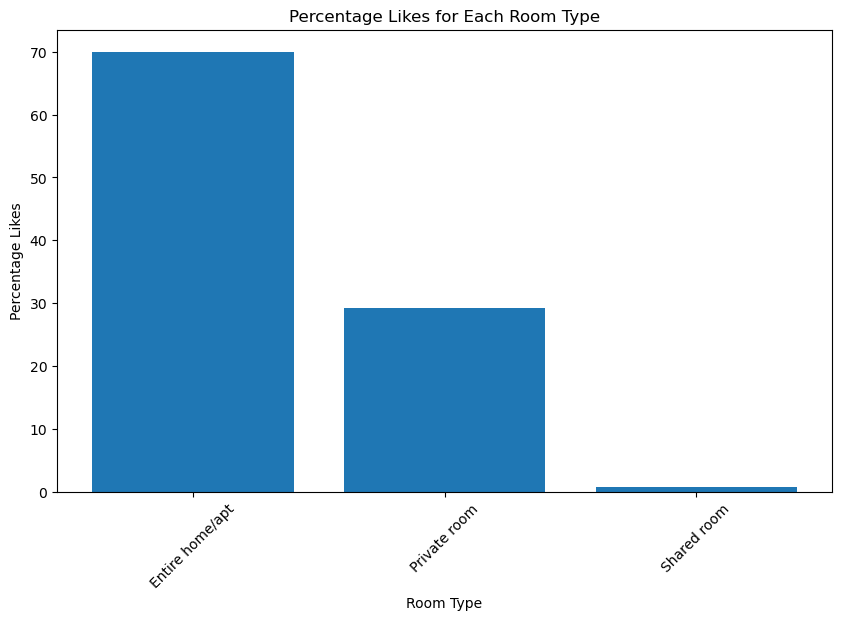

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(room_counts_df['room_type'], room_counts_df['percentage_likes'])
plt.xlabel('Room Type')
plt.ylabel('Percentage Likes')
plt.title('Percentage Likes for Each Room Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [14]:
minimum_nights_counts = df['minimum_nights'].value_counts()
minimum_nights_counts = id_counts.reset_index()
minimum_nights_counts.columns = ['min_nights', 'Count']
print(minimum_nights_counts)

    min_nights  Count
0            1    190
1            2    104
2            3     37
3            4     19
4           30     13
5           10     10
6            7      7
7            5      6
8           13      5
9           14      4
10          28      3
11           6      2
12          90      1
13          21      1
14         180      1
15          70      1
16         365      1
17          60      1
18          15      1


In [15]:
#how many minimum night stay does AirBnb candidates prefer?

sorted_minimum_nights_counts = minimum_nights_counts.sort_values(by='min_nights')

# Print the sorted DataFrame
print(sorted_minimum_nights_counts)

    min_nights  Count
0            1    190
1            2    104
2            3     37
3            4     19
7            5      6
11           6      2
6            7      7
5           10     10
8           13      5
9           14      4
18          15      1
13          21      1
10          28      3
4           30     13
17          60      1
15          70      1
12          90      1
14         180      1
16         365      1


In [16]:
values = sorted_minimum_nights_counts['min_nights'][:10]
frequencies = sorted_minimum_nights_counts['Count'][:10]

In [17]:
print(list(values))

[1, 2, 3, 4, 5, 6, 7, 10, 13, 14]


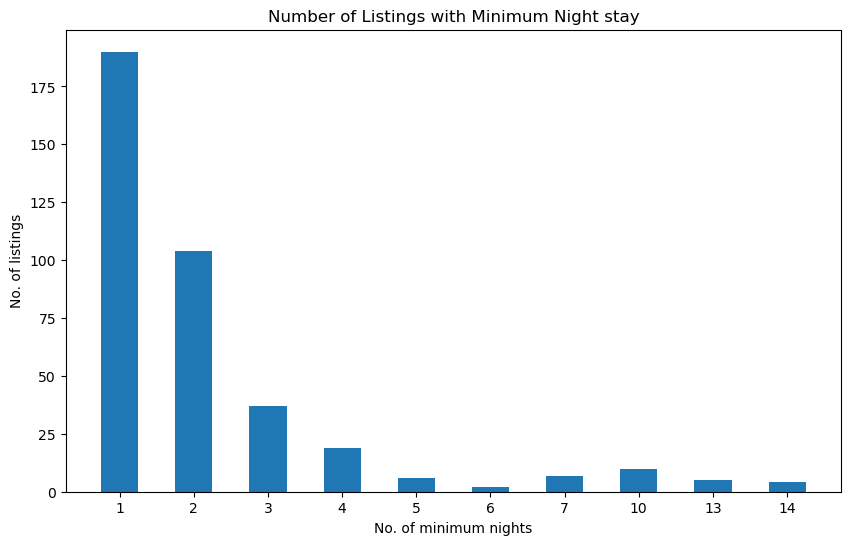

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(values)), frequencies, width=0.5)  # Adjust the number of bins as needed
plt.xlabel('No. of minimum nights')
plt.ylabel('No. of listings')
plt.title('Number of Listings with Minimum Night stay')
plt.xticks(range(len(values)), values)
plt.show()

In [19]:
print(column_names)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']


In [20]:
popular_host = df['host_name'].value_counts().reset_index()
popular_host.columns = ['host_name', 'Total_listings']
popular_host = popular_host.sort_values(by='host_name')
print(popular_host)

    host_name  Total_listings
141     Aaron               1
12       Abba               6
44       Adam               2
59       Adem               2
30      Aggie               3
..        ...             ...
171     Uniah               1
17   Urbangem               6
62    Vorakij               2
148     Wayne               1
82        Yan               1

[178 rows x 2 columns]


In [21]:
df[:]['room_type']

0         Private room
1      Entire home/apt
2      Entire home/apt
3      Entire home/apt
4      Entire home/apt
            ...       
402    Entire home/apt
403    Entire home/apt
404       Private room
405    Entire home/apt
406    Entire home/apt
Name: room_type, Length: 407, dtype: object

In [22]:
rooms_count_df = df.groupby(['host_name', 'room_type']).size().unstack(fill_value=0).reset_index()

# Rename the columns for better clarity
rooms_count_df.columns.name = None

# Print the resulting DataFrame
print(rooms_count_df)

    host_name  Entire home/apt  Private room  Shared room
0       Aaron                0             1            0
1        Abba                5             1            0
2        Adam                0             2            0
3        Adem                2             0            0
4       Aggie                3             0            0
..        ...              ...           ...          ...
173     Uniah                1             0            0
174  Urbangem                3             3            0
175   Vorakij                2             0            0
176     Wayne                1             0            0
177       Yan                0             1            0

[178 rows x 4 columns]


In [23]:
#popular hosts
merged_popular_host = pd.merge(rooms_count_df, popular_host, on='host_name', how='outer')
merged_popular_host = merged_popular_host.sort_values(by='Total_listings', ascending = False)
print(merged_popular_host)

     host_name  Entire home/apt  Private room  Shared room  Total_listings
40       Diana               20             2            0              22
101      Linda               15             1            0              16
50   Elizabeth               10             3            0              13
17       Argus                1            11            0              12
164      Terra                4             6            0              10
..         ...              ...           ...          ...             ...
71      JShing                1             0            0               1
69    Hyacinth                0             1            0               1
68          He                1             0            0               1
67       Hasan                1             0            0               1
177        Yan                0             1            0               1

[178 rows x 5 columns]
